<a href="https://colab.research.google.com/github/Djikshtra2601/Hello-World/blob/main/Galaxy_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import cufflinks as cf
cf.go_offline()
%matplotlib inline 

#Reading the data
from google.colab import files
uploaded = files.upload()
zoo = pd.read_csv('GalaxyZoo1_DR_table2.csv')
zoo.head()

Saving GalaxyZoo1_DR_table2.csv to GalaxyZoo1_DR_table2.csv


,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


In [3]:
data = zoo.drop(['OBJID','RA','DEC'],axis=1)

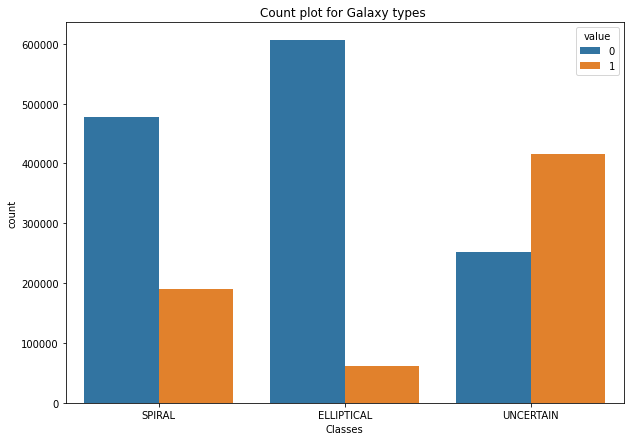

In [4]:
plt.figure(figsize=(10,7))
plt.title('Count plot for Galaxy types ')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()

In [5]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
# normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
start = time.perf_counter()

In [7]:
model.fit(x=X_train,y=y_train,epochs=20)
print('\nTIME ELAPSED {}Seconds'.format(time.perf_counter() - start))

Epoch 1/20
16699/16699 [==============================] - 29s 2ms/step - loss: 0.2829 - accuracy: 0.8786
Epoch 2/20
16699/16699 [==============================] - 27s 2ms/step - loss: 0.2489 - accuracy: 0.8922
Epoch 3/20
16699/16699 [==============================] - 27s 2ms/step - loss: 0.2417 - accuracy: 0.8953
Epoch 4/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2339 - accuracy: 0.8977
Epoch 5/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2307 - accuracy: 0.8983
Epoch 6/20
16699/16699 [==============================] - 27s 2ms/step - loss: 0.2294 - accuracy: 0.8987
Epoch 7/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2288 - accuracy: 0.8988
Epoch 8/20
16699/16699 [==============================] - 27s 2ms/step - loss: 0.2272 - accuracy: 0.8993
Epoch 9/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2256 - accuracy: 0.8994
Epoch 10/20
16699/16699 [==============================

NameError: ignored

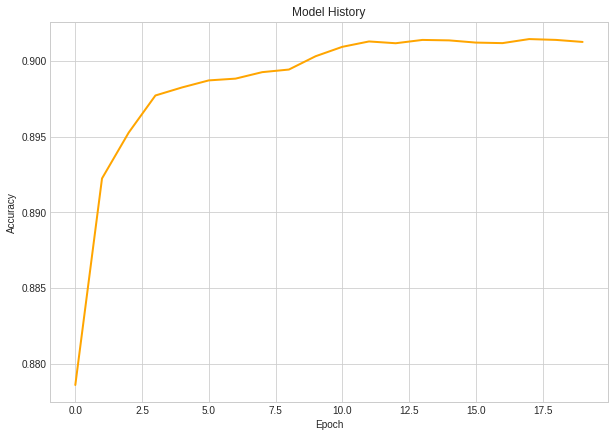

In [8]:
mod_history = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.title('Model History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'],color='orange',lw=2)

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test.argmax(axis=1),y_pred)
print(classification_report(y_test.argmax(axis=1),y_pred))

   precision    recall  f1-score   support

           0       0.84      0.93      0.88     38281
           1       0.90      0.77      0.83     12554
           2       0.93      0.90      0.92     82754

    accuracy                           0.90    133589
   macro avg       0.89      0.87      0.87    133589
weighted avg       0.90      0.90      0.90    133589